In [ ]:
!nvidia-smi


Sun Dec  1 07:59:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 24.3 MB/s eta 0:00:00


In [ ]:


from ultralytics import YOLO

import os

from IPython.display import display, Image

from IPython import display

display.clear_output()

!yolo mode checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 892, in entrypoint
    raise SyntaxError(
SyntaxError: 'mode' is a valid YOLO argument but is missing an '=' sign to set its value, i.e. try 'mode=train'

    Arguments received: ['yolo', 'mode', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'classify', 'pose', 'segment', 'detect'}
                MODE (required) is one of {'train', 'benchmark', 'val', 'track', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coc

In [ ]:
# prompt: connect to google drive to get a dataset

from google.colab import drive
drive.mount('/content/drive')
#Then you can access your dataset from the mounted drive
#Example:
# https://drive.google.com/drive/folders/1FBVOC1X68YN0H3q1T6bboP9bB6OQ7Meu?usp=drive_link
# dataset_path = "/content/drive/My Drive/YourDatasetFolder" #Change to your actual path
# print(os.listdir(dataset_path))
# # ...rest of your code using the dataset_path...


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/My Drive/Vehicle_Detection_Image_Dataset" #Change to your actual path
print(os.listdir(dataset_path))
# ...rest of your code using the dataset_path...

['sample_image.jpg', 'sample_video.mp4', 'README.roboflow.txt', 'README.dataset.txt', 'train', 'valid', 'data.yaml']


In [ ]:
# prompt: in the dataset_path there is data.yaml, print that

import os

dataset_path = "/content/drive/My Drive/Vehicle_Detection_Image_Dataset" #Change to your actual path

# Check if the file exists
data_yaml_path = os.path.join(dataset_path, "data.yaml")
if os.path.exists(data_yaml_path):
  with open(data_yaml_path, 'r') as file:
    print(file.read())
else:
  print(f"File not found: {data_yaml_path}")

train: ../train/images
val: ../valid/images

nc: 1
names: ['Vehicle']

roboflow:
  workspace: farzad
  project: vehicle_detection_yolov8
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3

  


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data="/content/drive/My Drive/Vehicle_Detection_Image_Dataset/data.yaml" epochs=20 imgsz=640


100% 49.7M/49.7M [00:00<00:00, 229MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/My Drive/Vehicle_Detection_Image_Dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

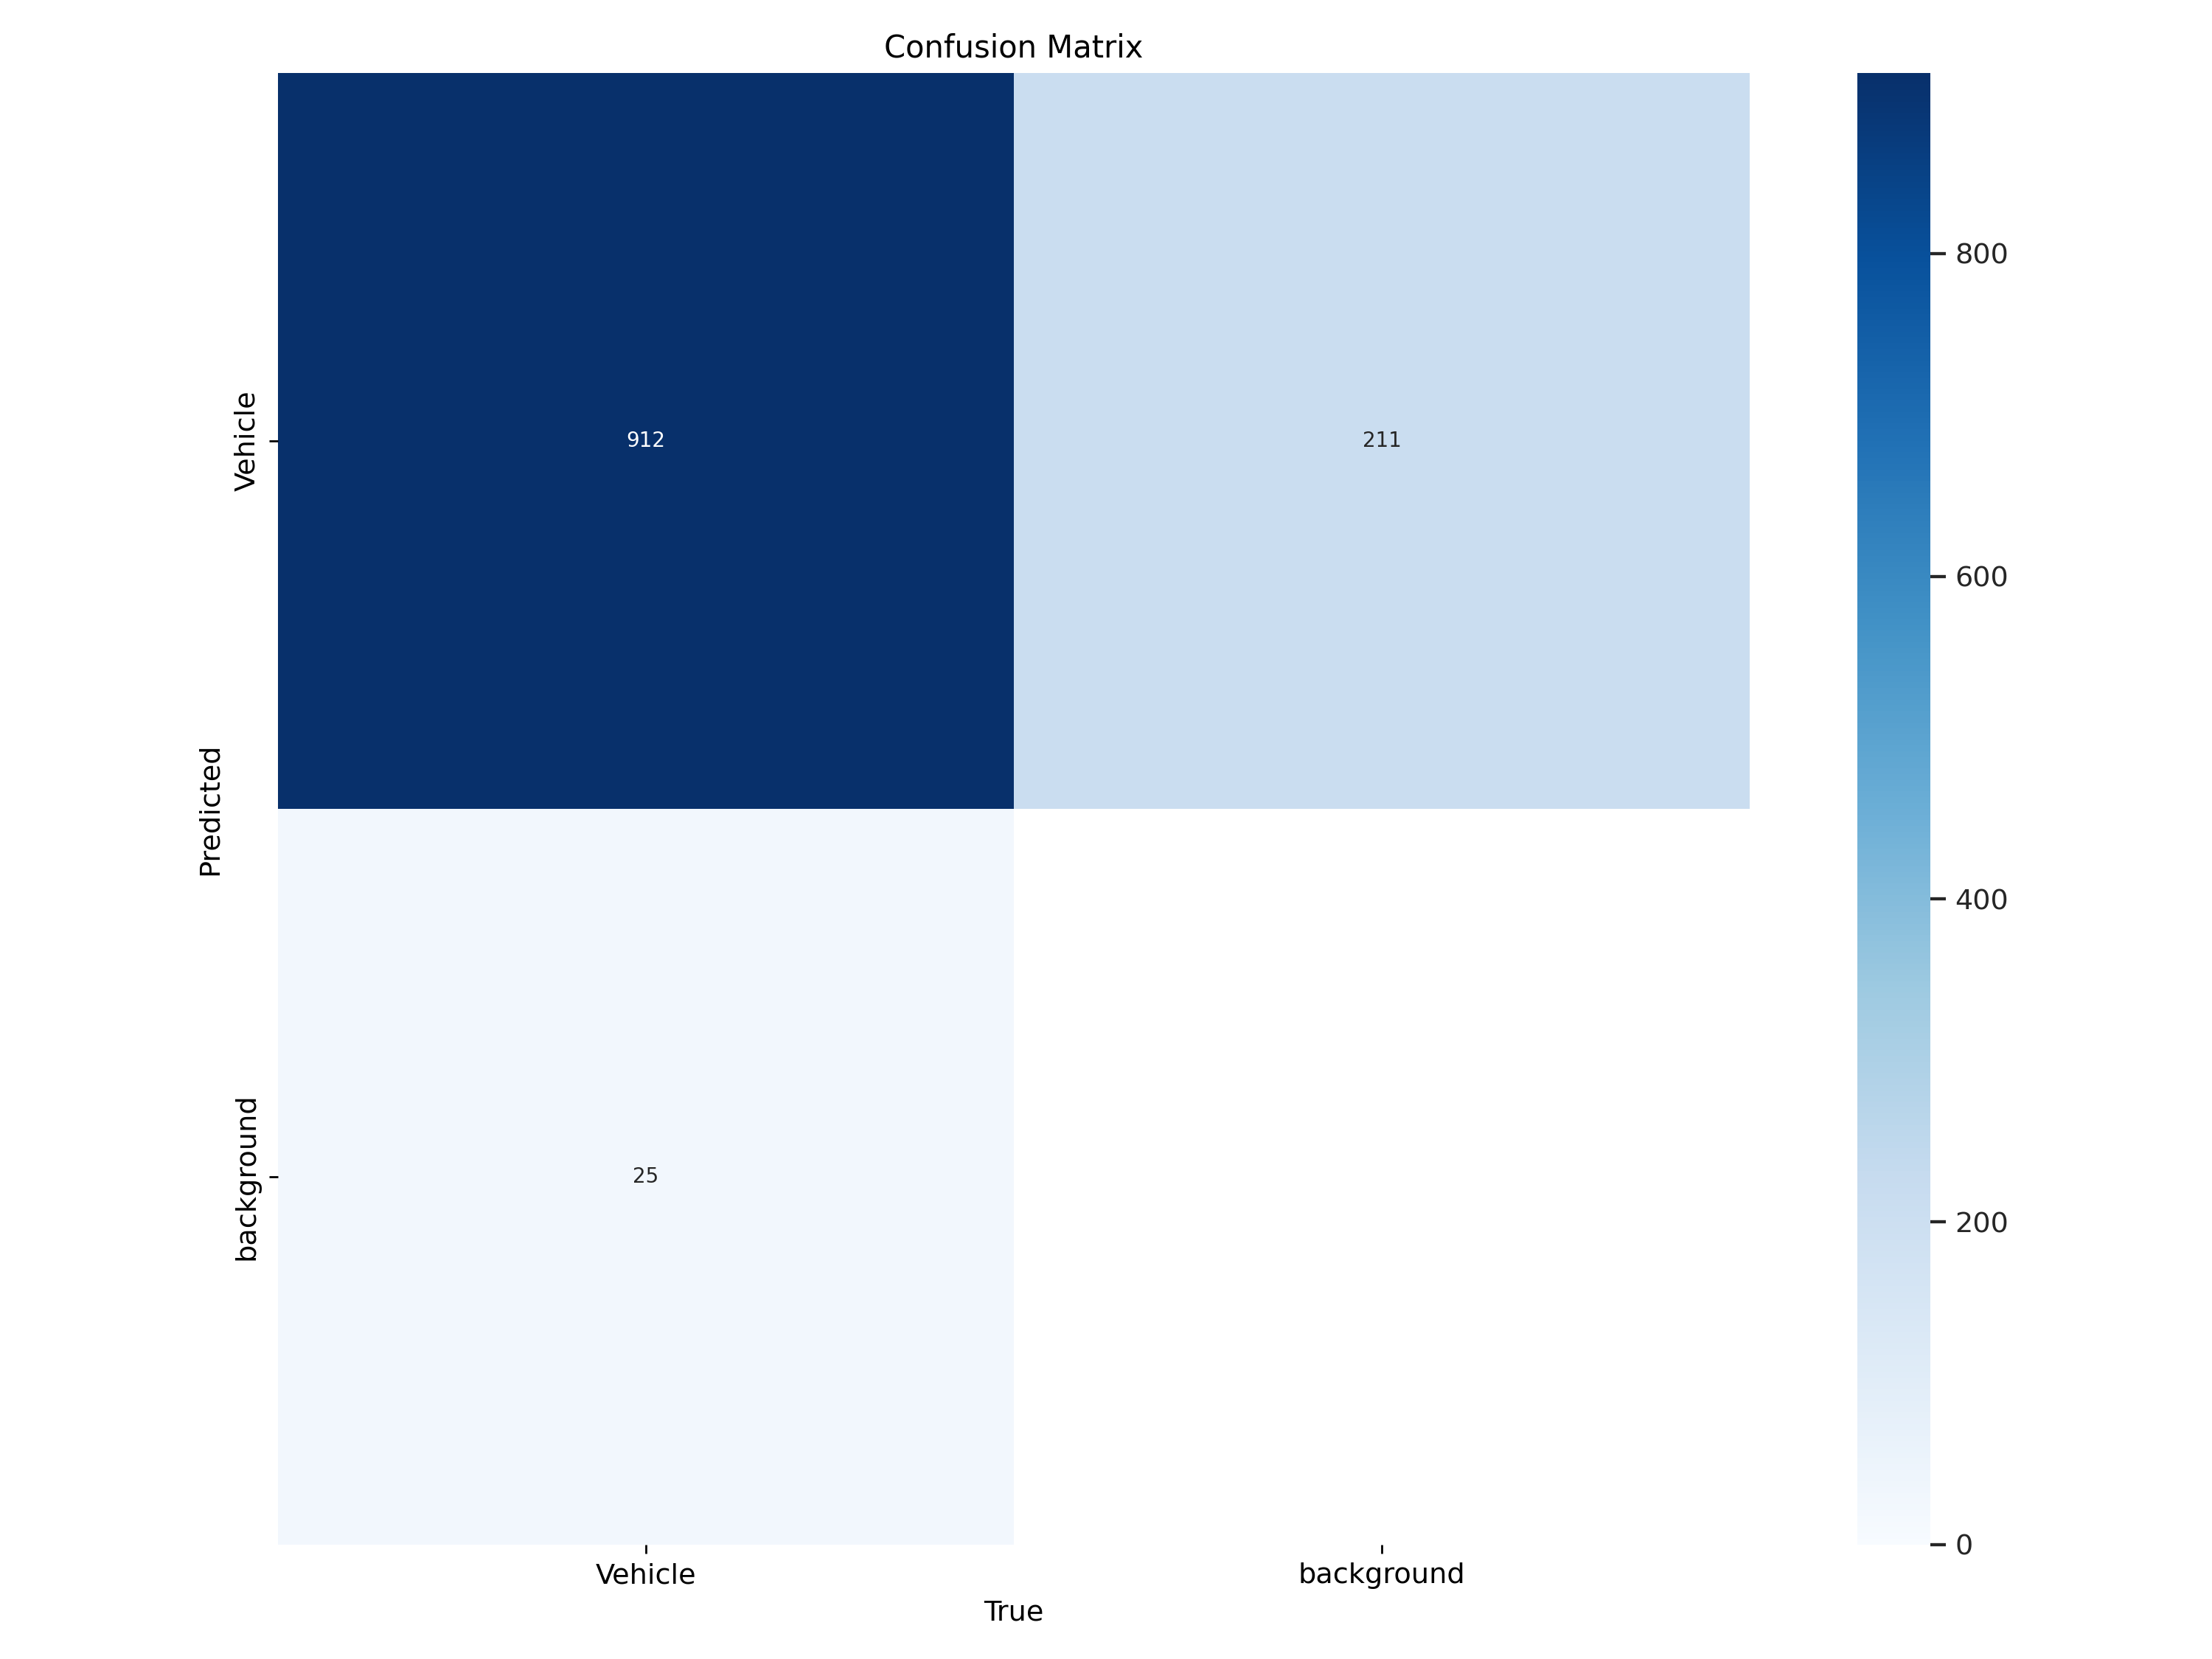

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

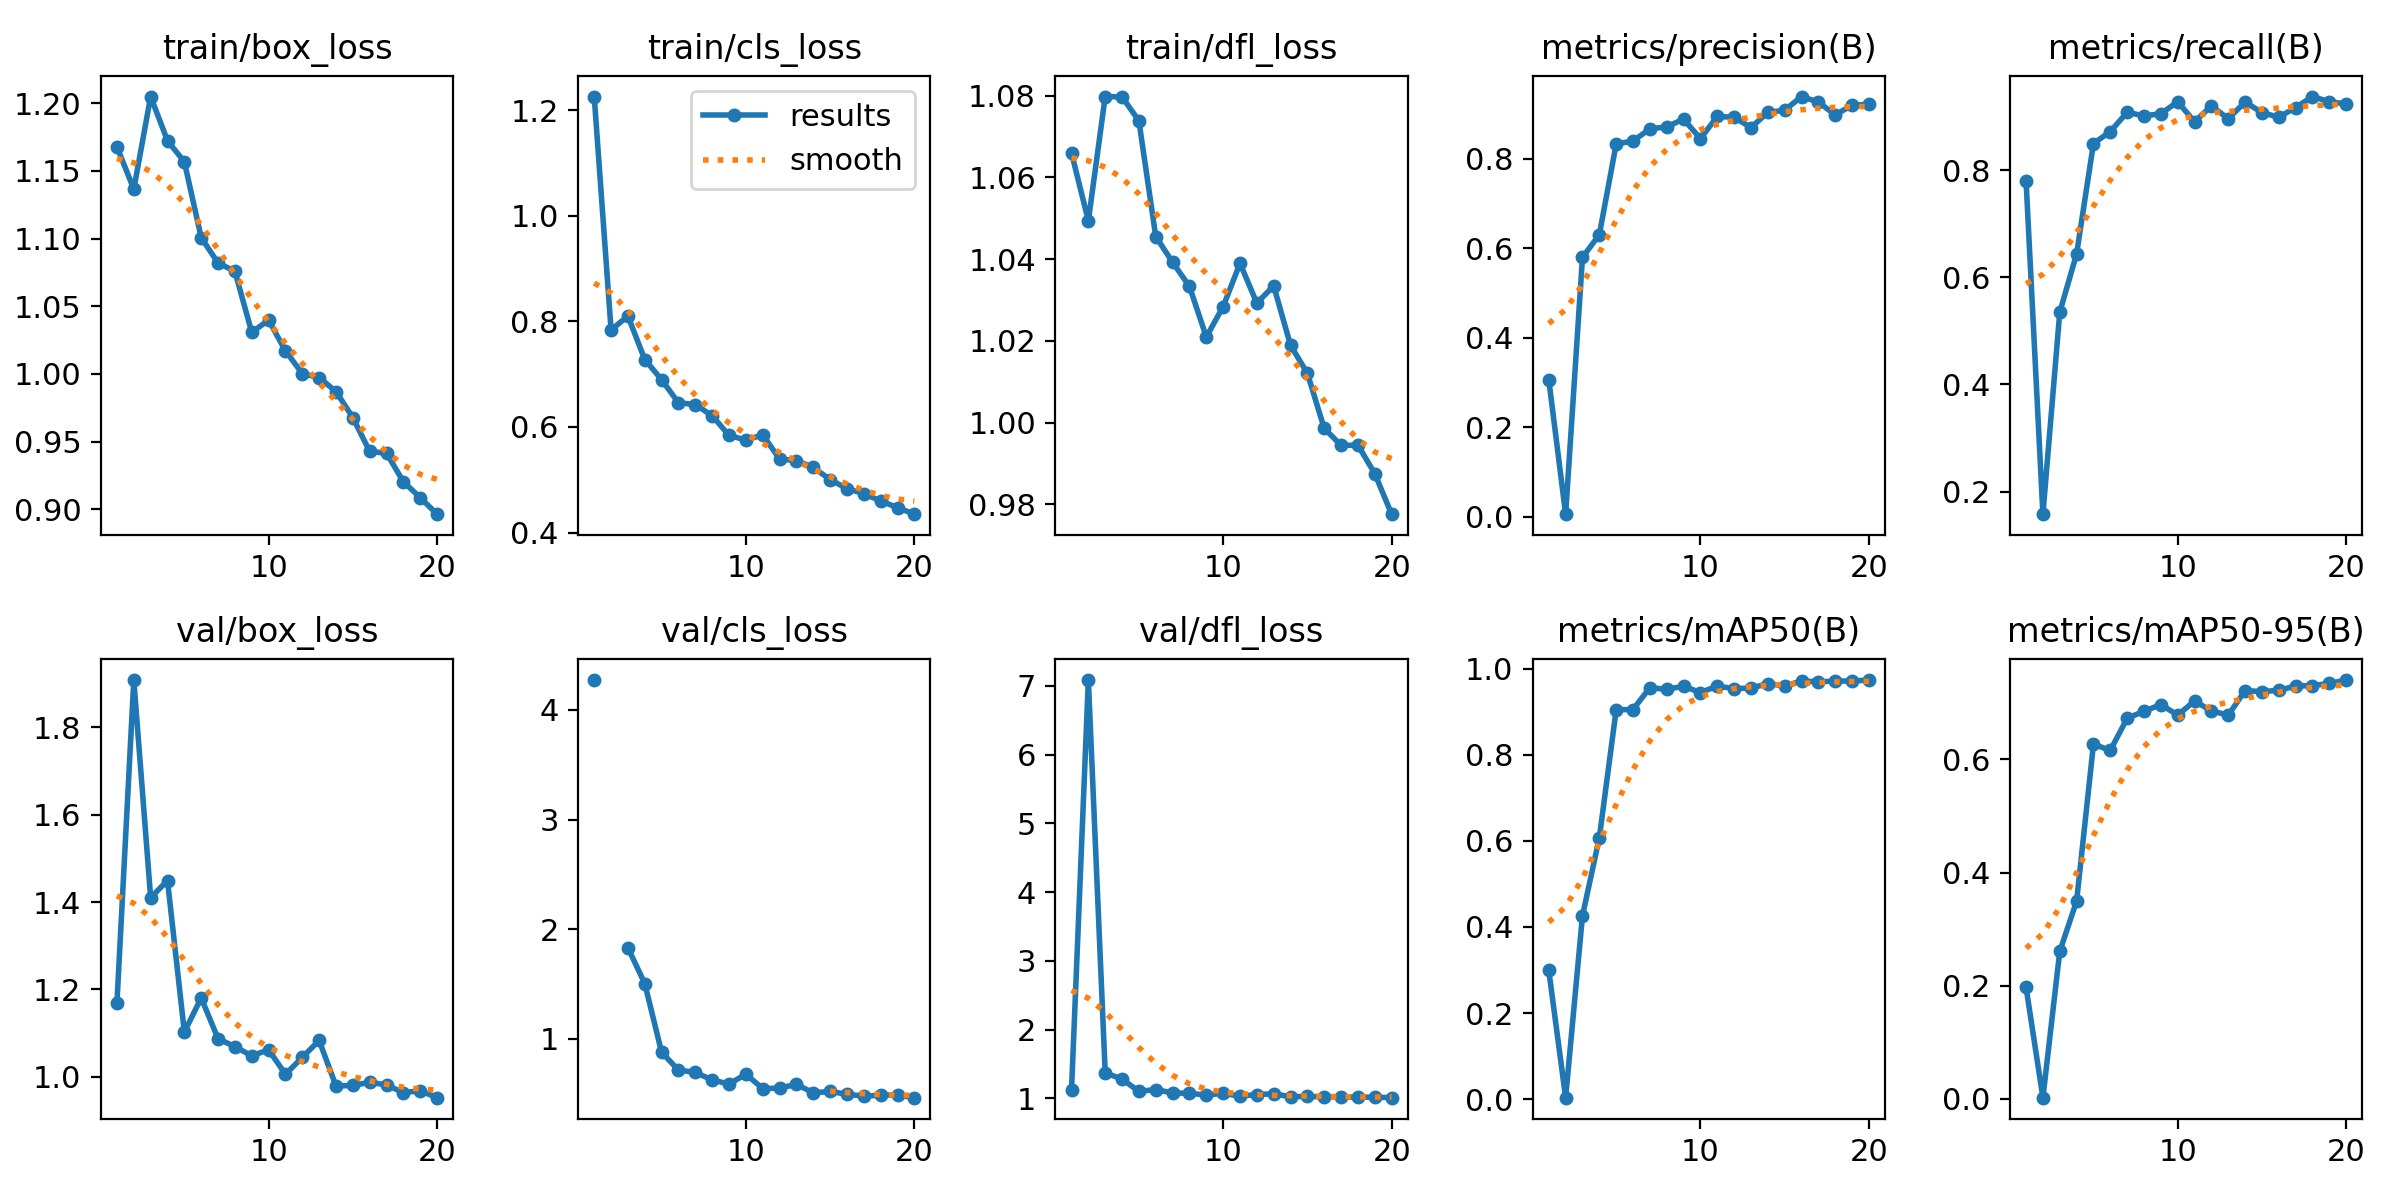

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)